In [1]:
reduce=function(data){
    differenze_mediane <- numeric(nrow(data))

# Calcola le differenze di mediana per ciascuna riga
for (i in 1:nrow(data)) {
  prima_riga <- data[i, ]
  DMSO <- prima_riga[1,]
  altri <- prima_riga[c(2,3)]
  mediana_DMSO <- median(as.numeric(DMSO))
  mediana_altri <- median(as.numeric(altri))
  differenza_mediana <- abs(mediana_altri-mediana_DMSO) 
  differenze_mediane[i] <- differenza_mediana
}

# Calcola la media e la deviazione standard delle differenze
media_differenze <- mean(differenze_mediane)
deviazione_standard_differenze <- sd(differenze_mediane)

# Imposta il numero di deviazioni standard sopra la media come soglia
numero_deviazioni_standard_soglia <- 1  # Cambia questo valore a seconda delle tue esigenze

# Calcola la soglia in base alla media e alla deviazione standard
soglia_differenza <- media_differenze + (numero_deviazioni_standard_soglia * deviazione_standard_differenze)

# Filtra i geni in base alla soglia di differenza
geni_filtrati <- risultati_differenze[risultati_differenze$Differenza_Mediana > soglia_differenza, ]

# Ordina il dataframe in base alla soglia di differenza
geni_ordinati <- geni_filtrati[order(geni_filtrati$Differenza_Mediana, decreasing = TRUE), ]
# Stampa i geni ordinati
data=data[geni_ordinati[,1],]
return(data)
    }

In [2]:
#Genes of HTGTS AID target
filteredgenes=rownames(read.table("/sharedFolder/Results/Ligase4/rpmPlot/filtered/filtered_rpm_hgtgtsHeatmapDIVIDED.csv",header=TRUE,row.names=1,sep=","))
genes=read.table("/sharedFolder/Results/Hotspot/Database_annotated.csv",sep=",",header=TRUE)
acciuga=c()
for(i in filteredgenes){
acciuga=append(acciuga,grep(i,genes[,7])[1])
}
jj=sapply(genes[acciuga,8],FUN=function(x){
strsplit(x,"_")[[1]]
})
jj=unique(as.vector(unlist(jj)))

In [3]:
library(ggplot2)
library(GenomicRanges)
library("stats")
library(scales)
library(dplyr)  # Carica il pacchetto dplyr
bnoExt=function(x){
return(basename(tools::file_path_sans_ext(x)))
}
fNumber=function(x){
sapply(x,FUN=function(x){
strsplit(x,"__")[[1]][2]
})
}
# Definisci colori e tipi di linee
color_mapping <- c(
  "DMSO" = "blue",
  "Taze" = "red",
  "Vale" = "orange"
)

linetype_mapping <- c(
  "DMSO" = "solid",
  "Taze" = "solid",
  "Vale" = "solid"
)


Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package: IRanges


Attaching package: ‘IRanges’


The following object is masked _by_ ‘.GlobalEnv’:

    reduce


Loading required package: GenomeInfoDb


Attaching package: ‘dplyr’

In [4]:
#TSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS

In [4]:
library(GenomicRanges)
library("BRGenomics")
filteredgenes=rownames(read.table("/sharedFolder/Results/Ligase4/rpmPlot/filtered/filtered_rpm_hgtgtsHeatmapDIVIDED.csv",header=TRUE,row.names=1,sep=","))
genes=read.table("/sharedFolder/Results/Hotspot/Database_annotated.csv",sep=",",header=TRUE)
acciuga=c()
for(i in filteredgenes){
acciuga=append(acciuga,grep(i,genes[,7])[1])
}
jj=sapply(genes[acciuga,8],FUN=function(x){
strsplit(x,"_")[[1]]
})
jj=unique(as.vector(unlist(jj)))
tss_file <- "/sharedFolder/Data/mm9_site_TSS.bed"
tss_file=read.table(tss_file,header=FALSE,sep="\t")
#keepTSS=c()           #
#for(asd in seq(length(jj))){  #
#uu=grep(toupper(jj[asd]),toupper(tss_file[,4]))   #
#if(length(uu)!=0){                                 #
#keepTSS=append(keepTSS,uu)                    #
#}     #
#}#
#tss_file=tss_file[keepTSS,] 
colnames(tss_file)=c("chrom", "start", "end", "gene", "score", "strand")
tss_gr <- GRanges(seqnames = tss_file$chrom, IRanges(start = tss_file$start, end = tss_file$end))

Loading required package: rtracklayer



In [29]:
print("Acetilation")      #
all_data <- data.frame()
all_dataRAW <- data.frame()
for(cycler in c("DMSO","Taze","Vale")){
dmso_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_",cycler,"/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
distanceVector=c()
rpmVector=c()
dmso_pos=dmso_poso
    dmso <- GRanges(
  seqnames = dmso_pos$chr,
  ranges = IRanges(start = as.numeric(abs(dmso_pos$end+dmso_pos$start)/2), end = as.numeric(abs(dmso_pos$end+dmso_pos$start)/2)),
  signal = as.numeric(dmso_pos$pileup)
)
  
#REMOVE MYC and IGH LOCUS   1
myc=GRanges(seqnames="chr15",ranges=IRanges(start=60562682,end=63076130))
toRemove=findOverlaps(myc,dmso)@to
igh=GRanges(seqnames="chr12",ranges=IRanges(start=114419999,end=114680000))
toRemove=append(toRemove,findOverlaps(igh,dmso)@to)
if(length(toRemove!=0)){
junctions_gr=dmso[-toRemove,]}else{junctions_gr=dmso}
    #2
print("asdasjfhas")
distance_GR=distanceToNearest(junctions_gr,tss_gr)
distance=start(junctions_gr[queryHits(distance_GR)])- start(tss_gr[subjectHits(distance_GR)])
 #3
print("asdasjfhas")
distance=distance[which(abs(distance)<=2000)]
junctions_gr=junctions_gr[queryHits(distance_GR)][which(abs(distance)<=2000)]
rpm=junctions_gr$signal   
distanceVector=append(distanceVector,distance)    
rpmVector=append(rpmVector,rpm)    

rpm=rpmVector
distance=distanceVector
write.table(cbind(rpm,distance),paste("/sharedFolder/Results/SequencingV2/",cycler,"_Acetilation.csv"),col.names=FALSE,row.names=FALSE,sep=",")
f=smooth.spline(distance,rpm,spar=0.8)
cycle_data <- data.frame(distance = f$x, rpm = f$y, cycle = cycler)#
all_data <- rbind(all_data, cycle_data)
    
cycle_dataRAW <- data.frame(distance = distance, rpm = rpm, cycle = cycler)#
all_dataRAW <- rbind(all_dataRAW, cycle_dataRAW)
    }
all_data=as.data.frame(all_data)
all_dataRAW=as.data.frame(all_dataRAW)
print("finito")
plot=ggplot(all_data, aes(x = distance, y = rpm, color = cycle, linetype = cycle)) +
geom_line(data = all_data, aes(x = distance, y = rpm)) + #
scale_color_manual(values = color_mapping) +
scale_linetype_manual(values = linetype_mapping) +
#geom_smooth(method = "loess", formula = y ~ x, se = FALSE, linewidth = 1.5) +
labs(x = "Distance from TSS", y = "Spline fitted junctions distribution", title = "Spline fitted junctions distribution vs TSS distance") +
  theme_minimal() +
  theme(legend.position = "top") +
  coord_cartesian(xlim = c(-2000,2000))+
  theme(panel.grid = element_blank())  # Rimuovi la griglia
  #coord_cartesian(xlim = c(-8000,8000),ylim=c(0,4))
ggsave("/sharedFolder/TSS_AcetilationUUU.pdf", plot, bg = "white")

[1] "Acetilation"
[1] "asdasjfhas"
[1] "asdasjfhas"
[1] "asdasjfhas"
[1] "asdasjfhas"
[1] "asdasjfhas"
[1] "asdasjfhas"
[1] "finito"


Saving 6.67 x 6.67 in image


Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_random, chr8_random, chr9_random, chrM, chrUn_random
  - in 'y': chrY
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”
Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr13_random, chr1_random, chr4_random, chr8_random, chr9_random, chrM, chrUn_random
  - in 'y': chrY
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”
Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr13_random, chr17_random, chr1_random, chr3_random, chr4_random, chr8_random, chr9_random, chrM, chrUn_random, chrX_random
  - in 'y': chrY
  Make sure to always combine/compar

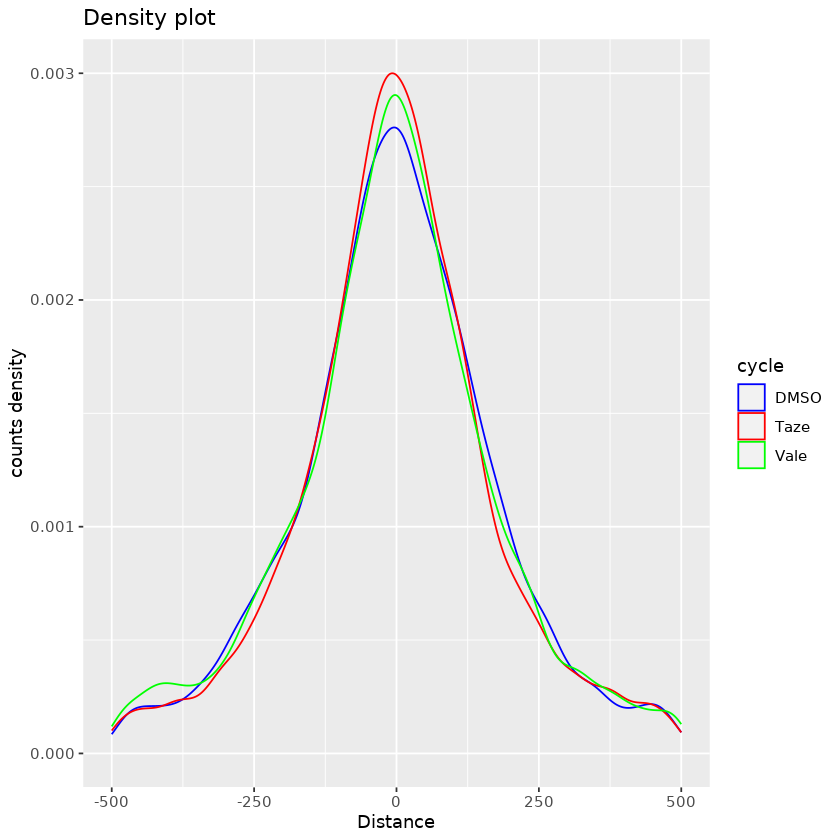

In [16]:
#taze_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_","Taze","/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
#vale_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_","Vale","/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
mat=matrix(ncol=3)
for(cycle in c("DMSO","Taze","Vale")){
    dmso_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_",cycle,"/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
dmso_poso=dmso_poso[which(dmso_poso$X.log10.qvalue.>mean(dmso_poso$X.log10.qvalue.)),]  #FILTRO PER LA MEDIA E PRENDO I MIGLIORI QVALUE

dmso <- GRanges(
  seqnames = dmso_poso$chr,
  ranges = IRanges(start = as.numeric(abs(dmso_poso$end+dmso_poso$start)/2), end = as.numeric(abs(dmso_poso$end+dmso_poso$start)/2)),
  signal = as.numeric(dmso_poso$abs_summit/dmso_poso$length)
)
myc=GRanges(seqnames="chr15",ranges=IRanges(start=60562682,end=63076130))
toRemove=findOverlaps(myc,dmso)@to
igh=GRanges(seqnames="chr12",ranges=IRanges(start=114419999,end=114680000))
toRemove=append(toRemove,findOverlaps(igh,dmso)@to)
if(length(toRemove!=0)){
junctions_gr=dmso[-toRemove,]}else{junctions_gr=dmso}
#!!!!!!!!
cromosomi_comuni <- unique(seqnames(tss_gr))
junctions_gr <- junctions_gr[seqnames(junctions_gr) %in% cromosomi_comuni]
#!!!!!!!!!!


distance_GR=distanceToNearest(junctions_gr,tss_gr)
distance=start(junctions_gr[queryHits(distance_GR)])- start(tss_gr[subjectHits(distance_GR)])
distance=distance[which(abs(distance)<=500)]
junctions_gr=junctions_gr[queryHits(distance_GR)][which(abs(distance)<=500)]
mat=rbind(mat,cbind(distance,junctions_gr$signal,cycle))
}
mat=mat[-1,]
colnames(mat)=c("distance","counts","cycle")
mat=data.frame(mat)
# Carica il pacchetto ggplot2
library(ggplot2)

# Crea il plot di densità separato per ciascun ciclo con il colore delle linee
plot <- ggplot(mat, aes(x = as.numeric(distance), color = cycle)) +
  geom_density() +  # Plot di densità
  labs(x = "Distance", y = "counts density") +  # Etichette degli assi
  ggtitle("Density plot") +  # Titolo del plot
  scale_color_manual(values = c("DMSO" = "blue", "Taze" = "red", "Vale" = "green"))  # Specifica i colori

# Visualizza il plot
print(plot)

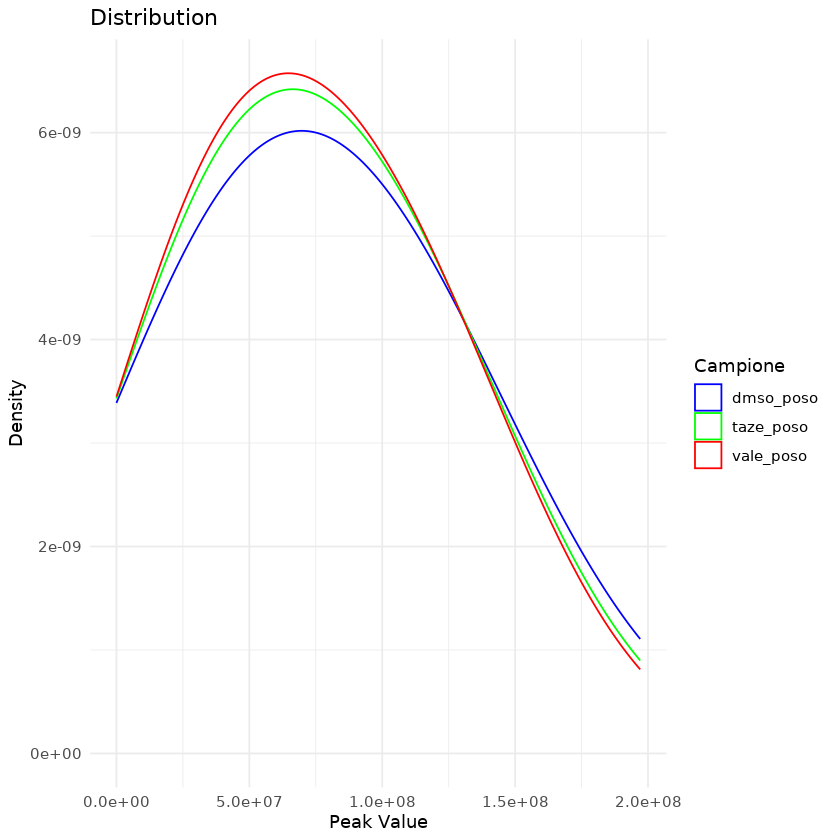

In [18]:
dmso_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_","DMSO","/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
dmso_poso=dmso_poso[which(dmso_poso$X.log10.qvalue.>mean(dmso_poso$X.log10.qvalue.)),]$abs_summit  #FILTRO PER LA MEDIA E PRENDO I MIGLIORI QVALUE

taze_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_","Taze","/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
taze_poso=taze_poso[which(taze_poso$X.log10.qvalue.>mean(taze_poso$X.log10.qvalue.)),]$abs_summit  #FILTRO PER LA MEDIA E PRENDO I MIGLIORI QVALUE

vale_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_","Vale","/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
vale_poso=vale_poso[which(vale_poso$X.log10.qvalue.>mean(vale_poso$X.log10.qvalue.)),]$abs_summit  #FILTRO PER LA MEDIA E PRENDO I MIGLIORI QVALUE


df <- data.frame(Campione = c(rep("dmso_poso", length(dmso_poso)),
                              rep("taze_poso", length(taze_poso)),
                              rep("vale_poso", length(vale_poso))),
                 Valore = c(dmso_poso, taze_poso, vale_poso))
library(ggplot2)

# Crea un grafico a densità kernel
ggplot(df, aes(x = Valore, color = Campione)) +
  geom_density(adjust=7) +
  #geom_density() +
    labs(title = "Distribution",
       x = "Peak Value", y = "Density") +
  scale_color_manual(values = c("dmso_poso" = "blue", "taze_poso" = "green", "vale_poso" = "red")) +
  theme_minimal()

geom_density {ggplot2},R Documentation
mapping,"Set of aesthetic mappings created by aes(). If specified and inherit.aes = TRUE (the default), it is combined with the default mapping at the top level of the plot. You must supply mapping if there is no plot mapping."
data,"The data to be displayed in this layer. There are three options: If NULL, the default, the data is inherited from the plot data as specified in the call to ggplot(). A data.frame, or other object, will override the plot data. All objects will be fortified to produce a data frame. See fortify() for which variables will be created. A function will be called with a single argument, the plot data. The return value must be a data.frame, and will be used as the layer data. A function can be created from a formula (e.g. ~ head(.x, 10))."
position,"Position adjustment, either as a string naming the adjustment (e.g. ""jitter"" to use position_jitter), or the result of a call to a position adjustment function. Use the latter if you need to change the settings of the adjustment."
...,"Other arguments passed on to layer(). These are often aesthetics, used to set an aesthetic to a fixed value, like colour = ""red"" or size = 3. They may also be parameters to the paired geom/stat."
na.rm,"If FALSE, the default, missing values are removed with a warning. If TRUE, missing values are silently removed."
orientation,"The orientation of the layer. The default (NA) automatically determines the orientation from the aesthetic mapping. In the rare event that this fails it can be given explicitly by setting orientation to either ""x"" or ""y"". See the Orientation section for more detail."
show.legend,"logical. Should this layer be included in the legends? NA, the default, includes if any aesthetics are mapped. FALSE never includes, and TRUE always includes. It can also be a named logical vector to finely select the aesthetics to display."
inherit.aes,"If FALSE, overrides the default aesthetics, rather than combining with them. This is most useful for helper functions that define both data and aesthetics and shouldn't inherit behaviour from the default plot specification, e.g. borders()."
outline.type,"Type of the outline of the area; ""both"" draws both the upper and lower lines, ""upper""/""lower"" draws the respective lines only. ""full"" draws a closed polygon around the area."
"geom, stat",Use to override the default connection between geom_density() and stat_density().


Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_random, chr8_random, chr9_random, chrM, chrUn_random
  - in 'y': chrY
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”
Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr13_random, chr1_random, chr4_random, chr8_random, chr9_random, chrM, chrUn_random
  - in 'y': chrY
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”
Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr13_random, chr17_random, chr1_random, chr3_random, chr4_random, chr8_random, chr9_random, chrM, chrUn_random, chrX_random
  - in 'y': chrY
  Make sure to always combine/compar

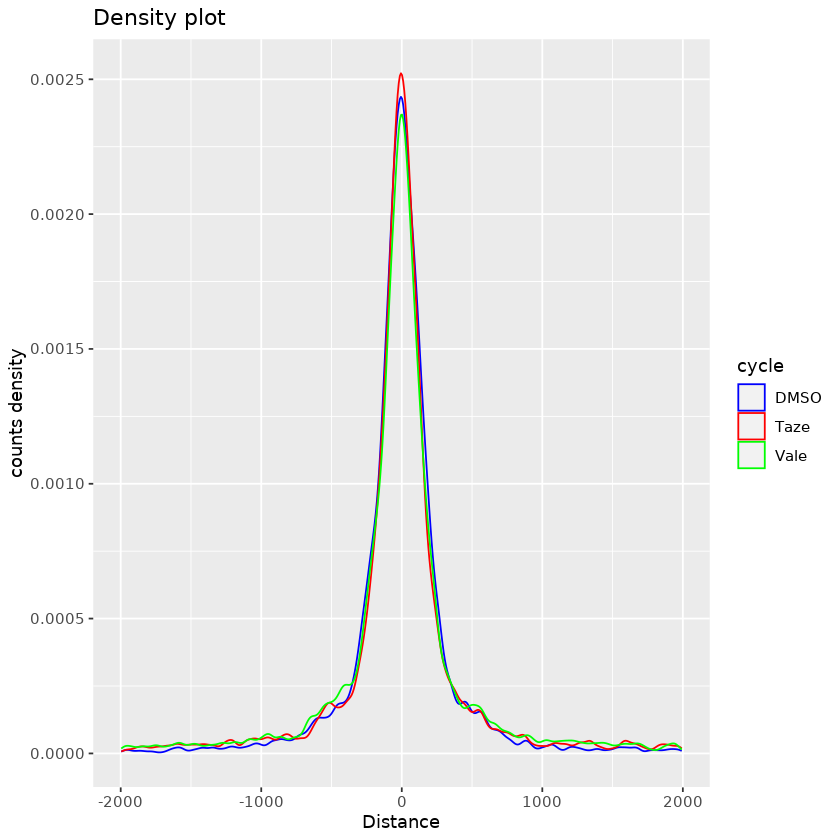

In [11]:
mat=matrix(ncol=3)
for(cycle in c("DMSO","Taze","Vale")){
    dmso_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_",cycle,"/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
dmso_poso=dmso_poso[which(dmso_poso$X.log10.qvalue.>mean(dmso_poso$X.log10.qvalue.)),]  #FILTRO PER LA MEDIA E PRENDO I MIGLIORI QVALUE

dmso <- GRanges(
  seqnames = dmso_poso$chr,
  ranges = IRanges(start = as.numeric(abs(dmso_poso$end+dmso_poso$start)/2), end = as.numeric(abs(dmso_poso$end+dmso_poso$start)/2)),
  signal = as.numeric(dmso_poso$abs_summit/dmso_poso$length)
)
myc=GRanges(seqnames="chr15",ranges=IRanges(start=60562682,end=63076130))
toRemove=findOverlaps(myc,dmso)@to
igh=GRanges(seqnames="chr12",ranges=IRanges(start=114419999,end=114680000))
toRemove=append(toRemove,findOverlaps(igh,dmso)@to)
if(length(toRemove!=0)){
junctions_gr=dmso[-toRemove,]}else{junctions_gr=dmso}
#!!!!!!!!
cromosomi_comuni <- unique(seqnames(tss_gr))
junctions_gr <- junctions_gr[seqnames(junctions_gr) %in% cromosomi_comuni]
#!!!!!!!!!!


distance_GR=distanceToNearest(junctions_gr,tss_gr)
distance=start(junctions_gr[queryHits(distance_GR)])- start(tss_gr[subjectHits(distance_GR)])
distance=distance[which(abs(distance)<=2000)]
junctions_gr=junctions_gr[queryHits(distance_GR)][which(abs(distance)<=2000)]
mat=rbind(mat,cbind(distance,junctions_gr$signal,cycle))
}
mat=mat[-1,]
colnames(mat)=c("distance","counts","cycle")
mat=data.frame(mat)
# Carica il pacchetto ggplot2
library(ggplot2)

# Crea il plot di densità separato per ciascun ciclo con il colore delle linee
plot <- ggplot(mat, aes(x = as.numeric(distance), color = cycle)) +
  geom_density() +  # Plot di densità
  labs(x = "Distance", y = "counts density") +  # Etichette degli assi
  ggtitle("Density plot") +  # Titolo del plot
  scale_color_manual(values = c("DMSO" = "blue", "Taze" = "red", "Vale" = "green"))  # Specifica i colori

# Visualizza il plot
print(plot)

In [9]:
dmso_poso

,chr,start,end,length,abs_summit,pileup,X.log10.pvalue.,fold_enrichment,X.log10.qvalue.,name
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
8,chr1,4775547,4776079,533,4775727,18,17.11660,9.26920,12.96320,macs2_peak_q0.1_peak_8
9,chr1,4797579,4797880,302,4797710,17,13.97450,7.63521,10.18260,macs2_peak_q0.1_peak_9
11,chr1,4847520,4848127,608,4847729,29,20.70970,8.15483,16.17350,macs2_peak_q0.1_peak_11
13,chr1,4904492,4904795,304,4904618,15,11.41880,6.58463,7.94473,macs2_peak_q0.1_peak_13
15,chr1,5073222,5073534,313,5073296,9,8.27035,5.81422,5.23789,macs2_peak_q0.1_peak_15
18,chr1,5223027,5223306,280,5223207,10,8.71133,5.94370,5.61324,macs2_peak_q0.1_peak_18
21,chr1,6204313,6204935,623,6204622,22,14.43680,6.64433,10.59010,macs2_peak_q0.1_peak_21
22,chr1,6205118,6205470,353,6205266,19,11.69080,5.83873,8.18154,macs2_peak_q0.1_peak_22
24,chr1,6253155,6253446,292,6253278,12,11.93940,7.55848,8.39685,macs2_peak_q0.1_peak_24
